***
### Import required Libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Statistical test 
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data encoding
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# set the max columns to 55 
pd.set_option('display.max_columns',55)

### Load the Data into Pandas

In [3]:
# Load churn dataset into Pandas dataframe 

path = r"C:\Users\Abhishek\Desktop\D208\Churn Data\churn_clean.csv"
 
df_churn = pd.read_csv(path, index_col=1) 
df_churn.head()   

# Drop the variables which are not needed to answer the research question. 

df_churn.drop(columns=['CaseOrder', 'Lat','Lng', 'Interaction', 'UID', 'City', 'State', 'Zip', 'Churn', 
                       'Population', 'Job', 'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 
                       'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'PaymentMethod','Email', 
                       'County', 'Area', 'TimeZone'],inplace=True)

#Renames the last 8 survey columns for a better description of variables 

df_churn.rename(columns = {'Item1' : 'Timely_Response',
                    'Item2' : 'Timely_Fixes',
                    'Item3' : 'Timely_Replacements',
                    'Item4' : 'Reliability',
                    'Item5' : 'Options',
                    'Item6' : 'Respectfulness',
                    'Item7' : 'Courteous_Exchange',
                    'Item8' : 'Active_Listening'}, inplace=True) 

# check for null 
print("Check for Nulls")
print("-"*100)
print(df_churn.isnull().any())

print("*"*100, '\n')


# check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_churn.isna().any())

print("*"*100)
print("Dataframe Information :", '\n')
print(df_churn.info())

Check for Nulls
----------------------------------------------------------------------------------------------------
Children                False
Age                     False
Income                  False
Outage_sec_perweek      False
Contacts                False
Yearly_equip_failure    False
Contract                False
InternetService         False
Multiple                False
PaperlessBilling        False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
Timely_Response         False
Timely_Fixes            False
Timely_Replacements     False
Reliability             False
Options                 False
Respectfulness          False
Courteous_Exchange      False
Active_Listening        False
dtype: bool
**************************************************************************************************** 

Check for Missing Values
----------------------------------------------------------------------------------------------------
Children    

In [4]:
# copy the dataframe before making any changes for regression
df_churn_origional = df_churn
df_churn_origional.head()

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Contract,InternetService,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectfulness,Courteous_Exchange,Active_Listening
Customer_id,,,,,,,,,,,,,,,,,,,,,
K409198,0,68,28561.99,7.978323,0,1,One year,Fiber Optic,No,Yes,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
S120509,1,27,21704.77,11.699080,0,1,Month-to-month,Fiber Optic,Yes,Yes,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
K191035,4,50,9609.57,10.752800,0,1,Two Year,DSL,Yes,Yes,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
D90850,1,48,18925.23,14.913540,2,0,Two Year,DSL,No,Yes,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
K662701,0,83,40074.19,8.147417,2,1,Month-to-month,Fiber Optic,No,No,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


## Wrangle the data
- Contract
- InternetService
- Multiple
- PaperlessBilling


References - https://pbpython.com/categorical-encoding.html


In [5]:
# Unique values for each categorical variable

print('-'*100)
print('Contract=', df_churn['Contract'].unique(), '\n')
print('InternetService=', df_churn['InternetService'].unique(), '\n')
print('Multiple=', df_churn['Multiple'].unique(), '\n')
print('PaperlessBilling=', df_churn['PaperlessBilling'].unique(), '\n')
print('-'*100)

----------------------------------------------------------------------------------------------------
Contract= ['One year' 'Month-to-month' 'Two Year'] 

InternetService= ['Fiber Optic' 'DSL' 'None'] 

Multiple= ['No' 'Yes'] 

PaperlessBilling= ['Yes' 'No'] 

----------------------------------------------------------------------------------------------------


#### Multiple and PaperlessBilling

In [6]:
# Label encoding for multiple variables 

cust_map = {"No": 0, "Yes": 1}         # Defining the mapping 

df_churn['Multiple'] = df_churn['Multiple'].map(cust_map)
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map(cust_map)
df_churn.head()

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Contract,InternetService,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectfulness,Courteous_Exchange,Active_Listening
Customer_id,,,,,,,,,,,,,,,,,,,,,
K409198,0,68,28561.99,7.978323,0,1,One year,Fiber Optic,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
S120509,1,27,21704.77,11.699080,0,1,Month-to-month,Fiber Optic,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
K191035,4,50,9609.57,10.752800,0,1,Two Year,DSL,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
D90850,1,48,18925.23,14.913540,2,0,Two Year,DSL,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
K662701,0,83,40074.19,8.147417,2,1,Month-to-month,Fiber Optic,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


#### Contract

Using LabelEncoder class from the sklearn.preprocessing module. 

Reference - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [7]:
# instantiate a LabelEncoder object
le = LabelEncoder()

# fit and transform the 'Contract' column
df_churn['Contract_Num'] = le.fit_transform(df_churn['Contract'])

# drop the categorical column for contract 
del df_churn['Contract']

df_churn.head()

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,InternetService,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectfulness,Courteous_Exchange,Active_Listening,Contract_Num
Customer_id,,,,,,,,,,,,,,,,,,,,,
K409198,0,68,28561.99,7.978323,0,1,Fiber Optic,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,1
S120509,1,27,21704.77,11.699080,0,1,Fiber Optic,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0
K191035,4,50,9609.57,10.752800,0,1,DSL,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,2
D90850,1,48,18925.23,14.913540,2,0,DSL,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,2
K662701,0,83,40074.19,8.147417,2,1,Fiber Optic,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0


#### InternetService

References - https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [8]:
# Perform one-hot encoding
df_churn = pd.get_dummies(df_churn, columns=['InternetService'])

# Print the encoded DataFrame
df_churn.head()

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Multiple,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectfulness,Courteous_Exchange,Active_Listening,Contract_Num,InternetService_DSL,InternetService_Fiber Optic,InternetService_None
Customer_id,,,,,,,,,,,,,,,,,,,,,,,
K409198,0,68,28561.99,7.978323,0,1,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,1,0,1,0
S120509,1,27,21704.77,11.699080,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,0,1,0
K191035,4,50,9609.57,10.752800,0,1,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,2,1,0,0
D90850,1,48,18925.23,14.913540,2,0,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,2,1,0,0
K662701,0,83,40074.19,8.147417,2,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,0,1,0


In [9]:
#drop 1 coulm for K-1 for regression !! 

del df_churn['InternetService_None']

df_churn.dtypes

Children                         int64
Age                              int64
Income                         float64
Outage_sec_perweek             float64
Contacts                         int64
Yearly_equip_failure             int64
Multiple                         int64
PaperlessBilling                 int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
Timely_Response                  int64
Timely_Fixes                     int64
Timely_Replacements              int64
Reliability                      int64
Options                          int64
Respectfulness                   int64
Courteous_Exchange               int64
Active_Listening                 int64
Contract_Num                     int32
InternetService_DSL              uint8
InternetService_Fiber Optic      uint8
dtype: object

#### Convert uint8 to int format 

To convert multiple columns of uint8 values to int values in a Pandas DataFrame we can use applymap() method to apply the astype() function to each element in the DataFrame. 

In [10]:
# convert uint8 columns to int
df_churn = df_churn.applymap(lambda x: int(x) if isinstance(x, int) else x)
print(df_churn.dtypes)

Children                         int64
Age                              int64
Income                         float64
Outage_sec_perweek             float64
Contacts                         int64
Yearly_equip_failure             int64
Multiple                         int64
PaperlessBilling                 int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
Timely_Response                  int64
Timely_Fixes                     int64
Timely_Replacements              int64
Reliability                      int64
Options                          int64
Respectfulness                   int64
Courteous_Exchange               int64
Active_Listening                 int64
Contract_Num                     int64
InternetService_DSL              int64
InternetService_Fiber Optic      int64
dtype: object


### Test for Multicollinearity 

In [11]:
# Drop the dependent varibale 
df_churn_X = df_churn.drop(columns=['Tenure'])

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Multiple,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectfulness,Courteous_Exchange,Active_Listening,Contract_Num,InternetService_DSL,InternetService_Fiber Optic
Children,1.000000,-0.029732,0.009942,0.001889,-0.020776,0.007321,-0.021969,0.006828,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236,0.023639,-0.003006,-0.003150
Age,-0.029732,1.000000,-0.004091,-0.008047,0.015068,0.008577,-0.004674,0.002247,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193,-0.010071,-0.004534,0.001240
Income,0.009942,-0.004091,1.000000,-0.010011,0.001233,0.005423,-0.000214,-0.012049,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740,-0.002990,0.018814,-0.016990
Outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.015092,0.002909,0.012142,-0.011208,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126,0.013021,-0.011458,0.004552
Contacts,-0.020776,0.015068,0.001233,0.015092,1.000000,-0.006032,-0.016090,-0.002649,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615,0.006719,0.010012,0.003987
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.006032,1.000000,0.002213,0.016603,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859,-0.001773,0.006189,-0.004556
Multiple,-0.021969,-0.004674,-0.000214,0.012142,-0.016090,0.002213,1.000000,-0.004657,0.385979,0.006823,0.009742,-0.012895,0.008178,-0.008308,-0.002405,-0.008261,0.010382,-0.007358,0.017002,0.010225,0.009210
PaperlessBilling,0.006828,0.002247,-0.012049,-0.011208,-0.002649,0.016603,-0.004657,1.000000,0.001348,-0.002470,0.009225,0.001964,-0.006431,0.005884,-0.003418,-0.005725,0.016817,0.009656,0.014542,-0.017909,0.017686
MonthlyCharge,-0.009781,0.010729,-0.003014,0.020496,0.004259,-0.007172,0.385979,0.001348,1.000000,0.060406,0.009756,0.003442,-0.008487,-0.000440,-0.005562,0.002943,-0.006399,0.002204,0.008465,-0.094398,0.286602
Bandwidth_GB_Year,0.025585,-0.014724,0.003674,0.004176,0.003299,0.012034,0.006823,-0.002470,0.060406,1.000000,-0.007314,0.003062,0.000978,-0.007789,0.025112,-0.010352,-0.001077,-0.015018,0.019202,0.103132,-0.061956


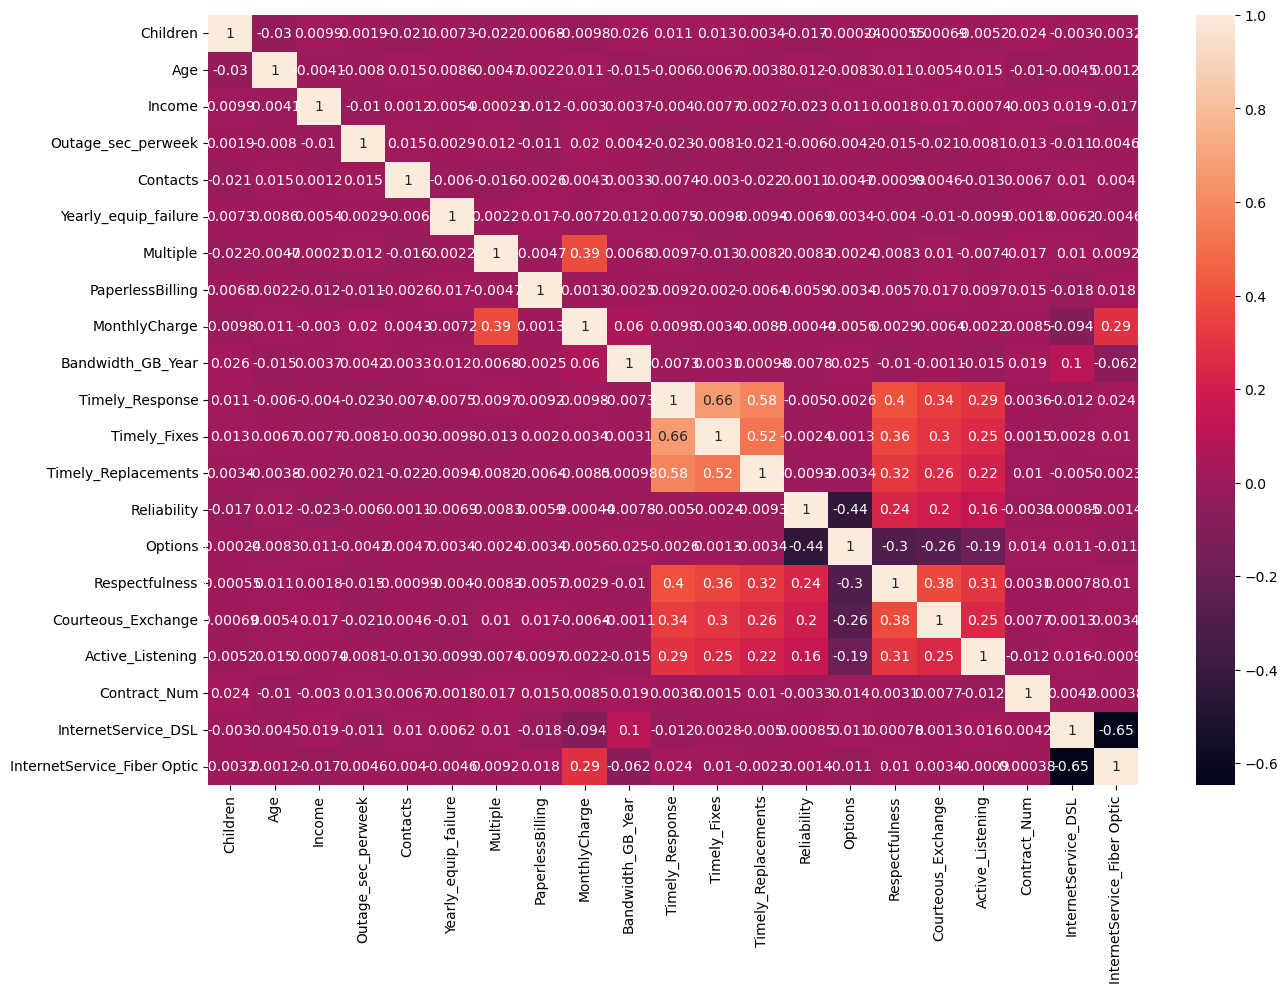

In [12]:
# calculate the correlation matrix
corr = df_churn_X.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

plt.show()

### VIF - Variance Inflation Factor

The variance_inflation_factor() function is applied to each independent variable in dataframe to calculate its corresponding VIF value. 

The VIF values are stored in a new dataframe vif_data and displayed using the print() function.

The VIF value of 1 indicates that there is no multicollinearity, while values above 1 indicate increasing levels of multicollinearity. A commonly used threshold for detecting multicollinearity is a VIF value of 5 or above.

References - https://www.statology.org/how-to-calculate-vif-in-python/

In [13]:
# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
10,Timely_Response,27.24
11,Timely_Fixes,24.05
8,MonthlyCharge,20.37
12,Timely_Replacements,19.78
15,Respectfulness,17.96
16,Courteous_Exchange,15.95
17,Active_Listening,14.44
13,Reliability,12.98
14,Options,11.36
3,Outage_sec_perweek,11.08


**Now repeting the same process to delete the variable where VIF > 10**

In [14]:
## drop Timely_Response
del df_churn_X['Timely_Response']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
8,MonthlyCharge,20.37
10,Timely_Fixes,19.04
11,Timely_Replacements,17.71
14,Respectfulness,17.51
15,Courteous_Exchange,15.73
16,Active_Listening,14.27
12,Reliability,12.94
13,Options,11.27
3,Outage_sec_perweek,11.07
1,Age,7.19


In [15]:
# drop MonthlyCharge
del df_churn_X['MonthlyCharge']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
9,Timely_Fixes,19.03
10,Timely_Replacements,17.70
13,Respectfulness,17.44
14,Courteous_Exchange,15.69
15,Active_Listening,14.20
11,Reliability,12.55
3,Outage_sec_perweek,10.87
12,Options,10.60
1,Age,7.12
8,Bandwidth_GB_Year,3.39


In [16]:
## drop Timely_Fixes
del df_churn_X['Timely_Fixes']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
12,Respectfulness,16.66
13,Courteous_Exchange,15.33
9,Timely_Replacements,14.51
14,Active_Listening,13.98
10,Reliability,12.54
3,Outage_sec_perweek,10.86
11,Options,10.32
1,Age,7.12
8,Bandwidth_GB_Year,3.39
17,InternetService_Fiber Optic,2.99


In [17]:
## drop Respectfulness
del df_churn_X['Respectfulness']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
12,Courteous_Exchange,14.17
9,Timely_Replacements,13.36
13,Active_Listening,13.32
10,Reliability,11.97
3,Outage_sec_perweek,10.82
11,Options,10.26
1,Age,7.09
8,Bandwidth_GB_Year,3.39
16,InternetService_Fiber Optic,2.98
2,Income,2.94


In [18]:
## drop Courteous_Exchange
del df_churn_X['Courteous_Exchange']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
12,Active_Listening,12.59
9,Timely_Replacements,12.03
10,Reliability,11.16
3,Outage_sec_perweek,10.75
11,Options,10.24
1,Age,7.05
8,Bandwidth_GB_Year,3.39
15,InternetService_Fiber Optic,2.97
2,Income,2.92
14,InternetService_DSL,2.59


In [19]:
## drop Active_Listening
del df_churn_X['Active_Listening']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
9,Timely_Replacements,10.67
3,Outage_sec_perweek,10.56
11,Options,10.21
10,Reliability,10.09
1,Age,6.98
8,Bandwidth_GB_Year,3.38
14,InternetService_Fiber Optic,2.96
2,Income,2.92
13,InternetService_DSL,2.57
7,PaperlessBilling,2.39


In [20]:
## drop Active_Listening
del df_churn_X['Timely_Replacements']

# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = df_churn_X.columns
vif_data['VIF'] = [variance_inflation_factor(df_churn_X.values, i) for i in range(df_churn_X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
3,Outage_sec_perweek,10.34
10,Options,9.34
9,Reliability,9.23
1,Age,6.88
8,Bandwidth_GB_Year,3.37
13,InternetService_Fiber Optic,2.94
2,Income,2.90
12,InternetService_DSL,2.56
7,PaperlessBilling,2.38
4,Contacts,1.99


**Drop all above variables from main dataframe !!**

In [21]:
# Drop the variables for high VIF

df_churn.drop(columns=['MonthlyCharge', 'Timely_Response', 'Timely_Fixes', 'Respectfulness', 'Timely_Replacements',
                       'Courteous_Exchange', 'Active_Listening'],inplace=True)
df_churn.head()

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Multiple,PaperlessBilling,Tenure,Bandwidth_GB_Year,Reliability,Options,Contract_Num,InternetService_DSL,InternetService_Fiber Optic
Customer_id,,,,,,,,,,,,,,,
K409198,0,68,28561.99,7.978323,0,1,0,1,6.795513,904.536110,3,4,1,0,1
S120509,1,27,21704.77,11.699080,0,1,1,1,1.156681,800.982766,3,4,0,0,1
K191035,4,50,9609.57,10.752800,0,1,1,1,15.754144,2054.706961,4,4,2,1,0
D90850,1,48,18925.23,14.913540,2,0,0,1,17.087227,2164.579412,2,5,2,1,0
K662701,0,83,40074.19,8.147417,2,1,0,0,1.670972,271.493436,3,4,0,0,1


**Below scatter matrix demonstrate another way to visualize our data to check for multicollinearity.** 

**The more random distribution show that varibales are not correlated.**

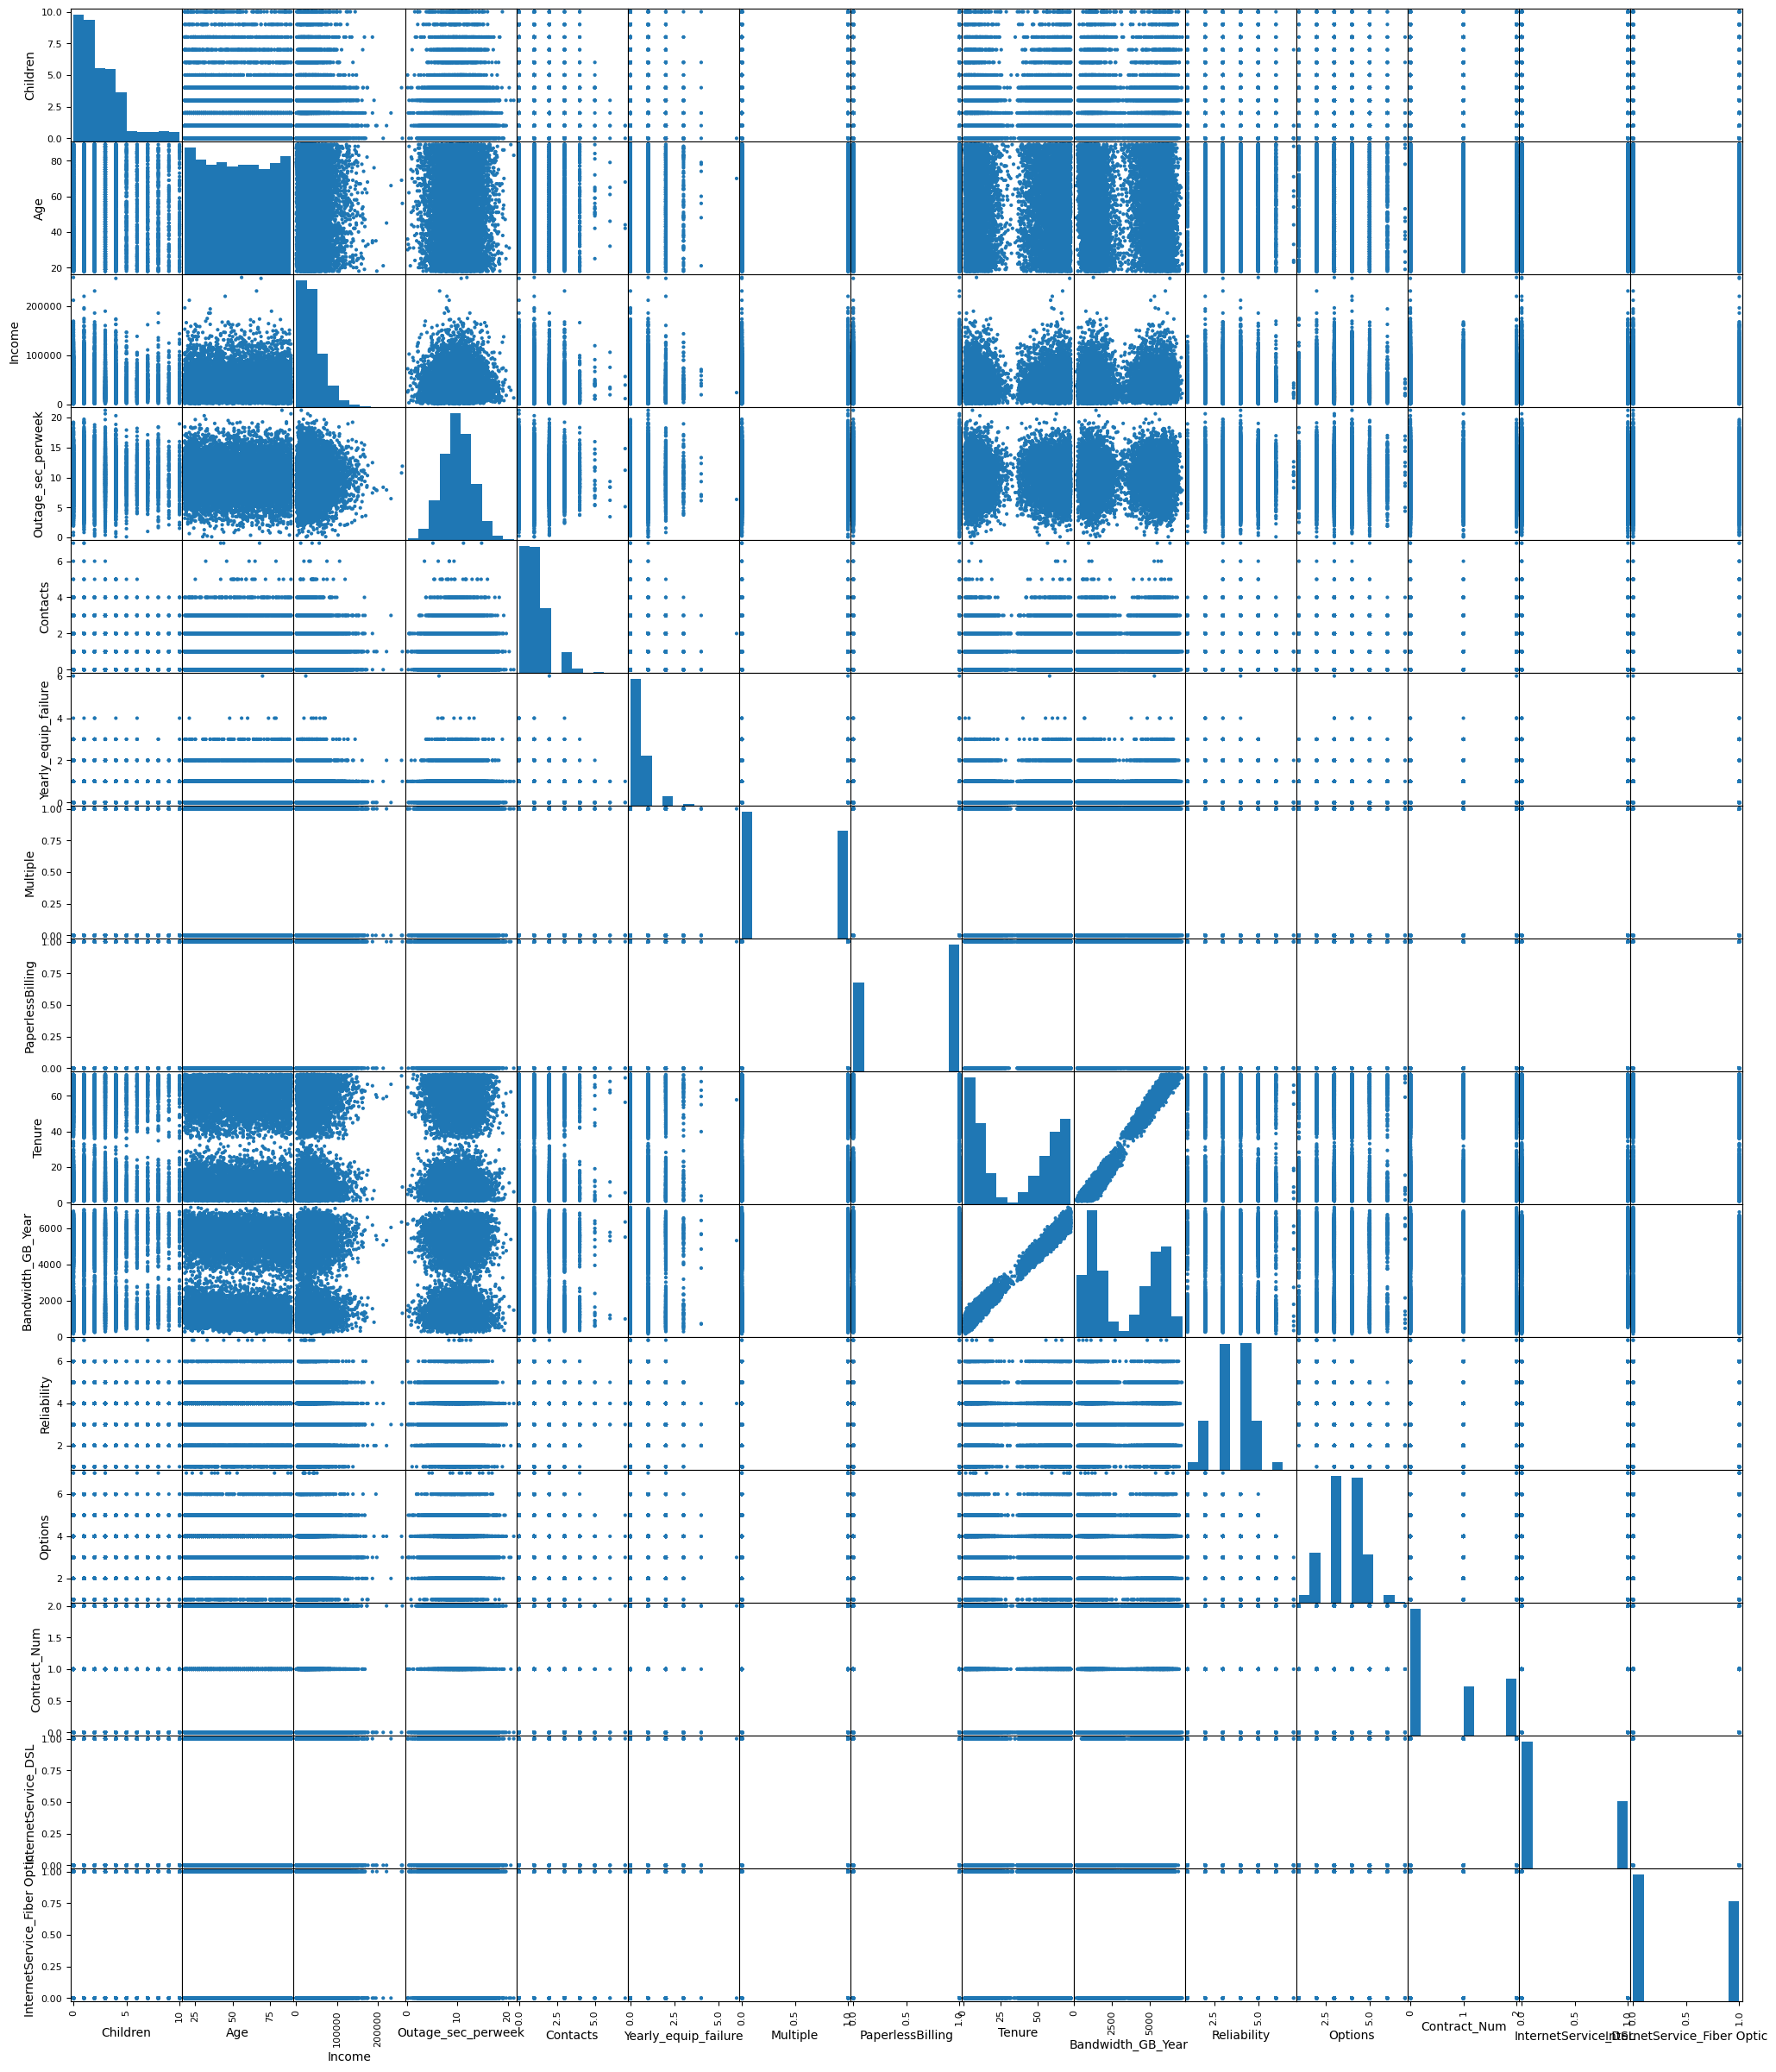

In [22]:
# define the plot
pd.plotting.scatter_matrix(df_churn, alpha = 1, figsize = (25, 30))

# show the plot
plt.show()

### Outliers 

Adding few more metrics to the summary data frame to includes a metric for three standard deviations below and above the mean. 

In [23]:
# get the summary
desc_df = df_churn.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Multiple,PaperlessBilling,Tenure,Bandwidth_GB_Year,Reliability,Options,Contract_Num,InternetService_DSL,InternetService_Fiber Optic
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.087700,53.078400,39806.926771,10.001848,0.994200,0.398000,0.460800,0.588200,34.526188,3392.341550,3.497500,3.492900,0.698600,0.346300,0.440800
std,2.147200,20.698882,28199.916702,2.976019,0.988466,0.635953,0.498486,0.492184,26.443063,2185.294852,1.025816,1.024819,0.836079,0.475814,0.496508
min,0.000000,18.000000,348.670000,0.099747,0.000000,0.000000,0.000000,0.000000,1.000259,155.506715,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,19224.717500,8.018214,0.000000,0.000000,0.000000,0.000000,7.917694,1236.470827,3.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,53.000000,33170.605000,10.018560,1.000000,0.000000,0.000000,1.000000,35.430507,3279.536903,3.000000,3.000000,0.000000,0.000000,0.000000
75%,3.000000,71.000000,53246.170000,11.969485,2.000000,1.000000,1.000000,1.000000,61.479795,5586.141370,4.000000,4.000000,1.000000,1.000000,1.000000
max,10.000000,89.000000,258900.700000,21.207230,7.000000,6.000000,1.000000,1.000000,71.999280,7158.981530,7.000000,7.000000,2.000000,1.000000,1.000000
+3_std,8.529301,115.175045,124406.676876,18.929906,3.959597,2.305860,1.956258,2.064752,113.855376,9948.226107,6.574949,6.567358,3.206837,1.773742,1.930323
-3_std,-4.353901,-9.018245,-44792.823334,1.073791,-1.971197,-1.509860,-1.034658,-0.888352,-44.803000,-3163.543008,0.420051,0.418442,-1.809637,-1.081142,-1.048723


### Univariate visualizations

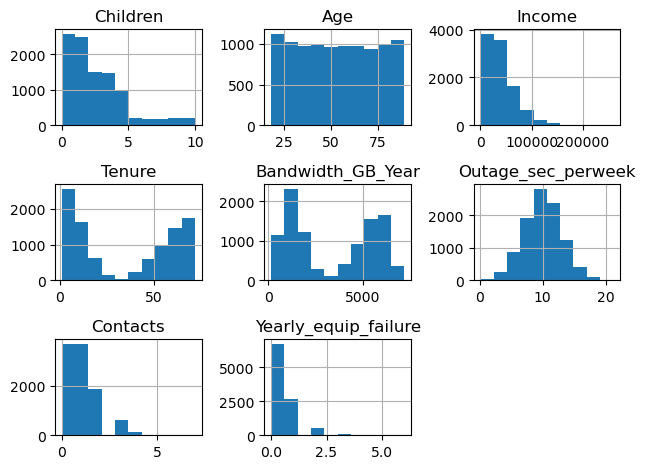

In [24]:
# Examine Distribution by histogram using Matplotlib before imputation

df_churn[['Children', 'Age', 'Income','Tenure', 'Bandwidth_GB_Year', 
          'Outage_sec_perweek','Contacts', 'Yearly_equip_failure']].hist()
#plt.savefig('churn_univariate_plot.jpg')
plt.tight_layout()

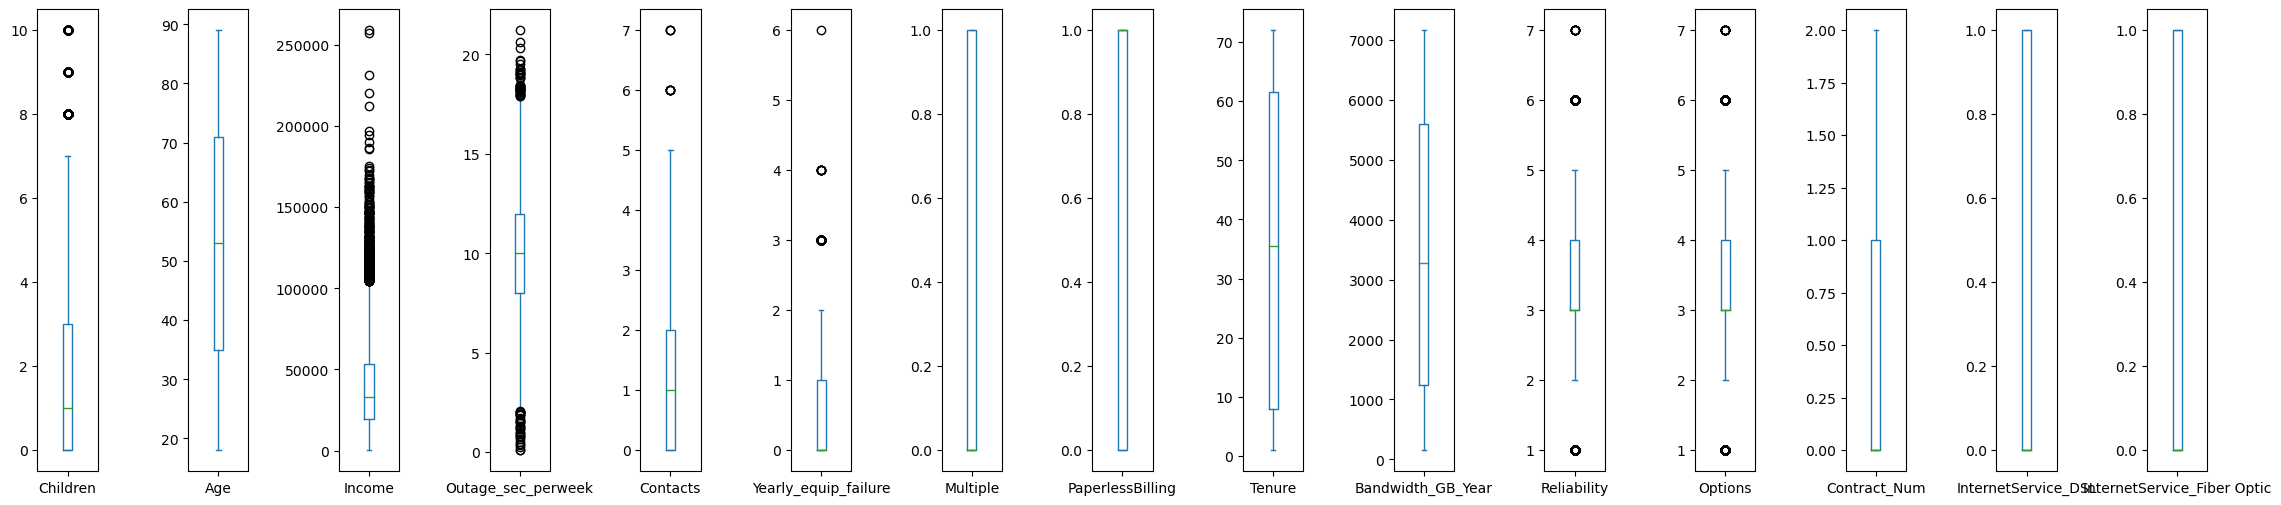

In [25]:
# create the boxplot for all the variables in the dataset using pandas' plot function 

df_churn.plot (
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(28,6)
)

# increase spacing between subplots 
plt.subplots_adjust(wspace=1.5)
plt.show()

**Contract** - Most of the customers seem to have a month-to-month contract with the telecom company

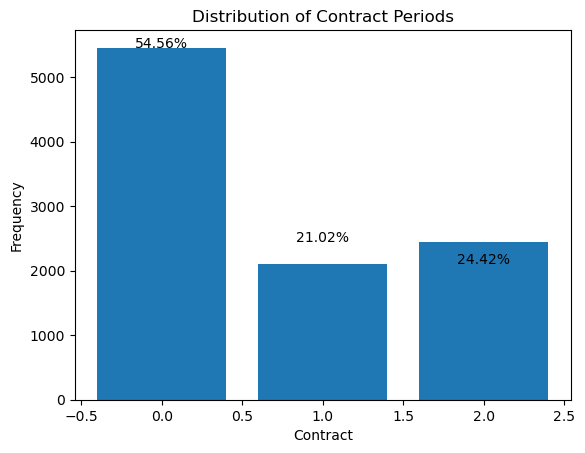

In [26]:
# count the frequency of each category
contract_count = df_churn['Contract_Num'].value_counts()

# calculate the percentage distribution of each category
percent = contract_count/len(df_churn_origional['Contract_Num'])*100

# create a bar chart to visualize the distribution
plt.bar(x=contract_count.index, height=contract_count.values)

# Add percentages to the chart
for i, count in enumerate(contract_count):
    plt.text(i, count+1, f"{percent[i]:.2f}%", ha="center")

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.title("Distribution of Contract Periods")
plt.show()

**InternetService** - Almost half of the customers have opted for internet service with Fiber Optic(44%) and 35% are with DSL

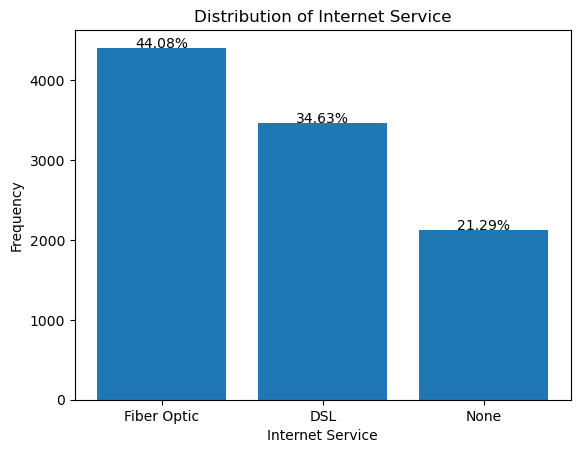

In [27]:
# count the frequency of each category
contract_count = df_churn_origional['InternetService'].value_counts()

# calculate the percentage distribution of each category
percent = contract_count/len(df_churn_origional['InternetService'])*100

# create a bar chart to visualize the distribution
plt.bar(x=contract_count.index, height=contract_count.values)

# Add percentages to the chart
for i, count in enumerate(contract_count):
    plt.text(i, count+1, f"{percent[i]:.2f}%", ha="center")

# Add labels and title
plt.xlabel('Internet Service')
plt.ylabel('Frequency')
plt.title("Distribution of Internet Service")
plt.show()

**Multiple** - More than 50% of customers did not opt for multiple services. 

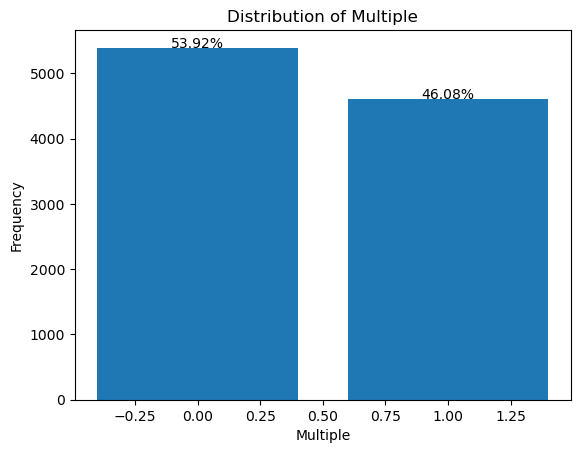

In [28]:
# count the frequency of each category
contract_count = df_churn['Multiple'].value_counts()

# calculate the percentage distribution of each category
percent = contract_count/len(df_churn['Multiple'])*100

# create a bar chart to visualize the distribution
plt.bar(x=contract_count.index, height=contract_count.values)

# Add percentages to the chart
for i, count in enumerate(contract_count):
    plt.text(i, count+1, f"{percent[i]:.2f}%", ha="center")

# Add labels and title
plt.xlabel('Multiple')
plt.ylabel('Frequency')
plt.title("Distribution of Multiple")
plt.show()

**PaperlessBilling**  - Around 58% of customers are using paperless billing. 

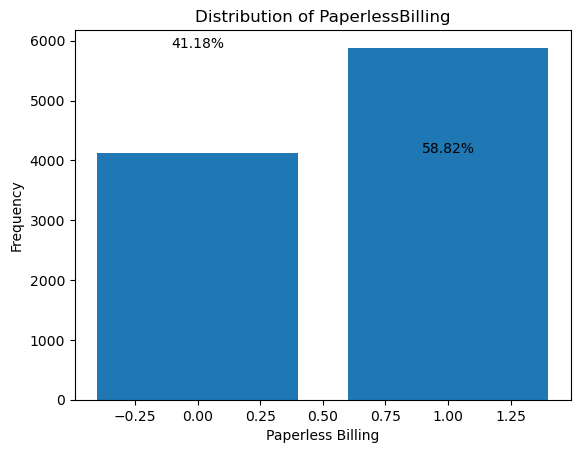

In [29]:
# count the frequency of each category
contract_count = df_churn['PaperlessBilling'].value_counts()

# calculate the percentage distribution of each category
percent = contract_count/len(df_churn['PaperlessBilling'])*100

# create a bar chart to visualize the distribution
plt.bar(x=contract_count.index, height=contract_count.values)

# Add percentages to the chart
for i, count in enumerate(contract_count):
    plt.text(i, count+1, f"{percent[i]:.2f}%", ha="center")

# Add labels and title
plt.xlabel('Paperless Billing')
plt.ylabel('Frequency')
plt.title("Distribution of PaperlessBilling")
plt.show()

### Bivariate Statistics 

With dependent variable Tenure

Reference - https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [30]:
df_churn.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts',
       'Yearly_equip_failure', 'Multiple', 'PaperlessBilling', 'Tenure',
       'Bandwidth_GB_Year', 'Reliability', 'Options', 'Contract_Num',
       'InternetService_DSL', 'InternetService_Fiber Optic'],
      dtype='object')

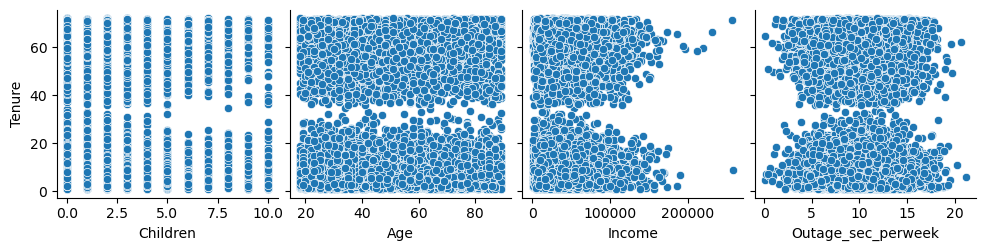

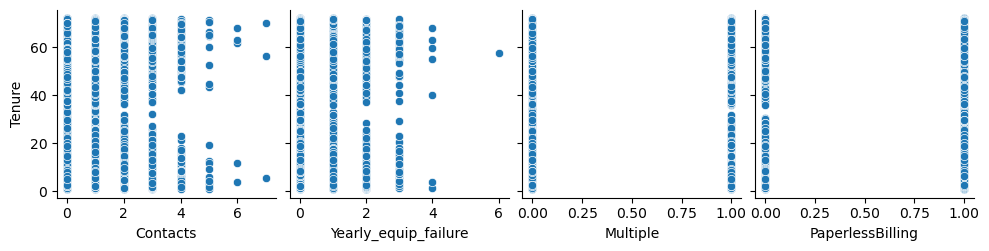

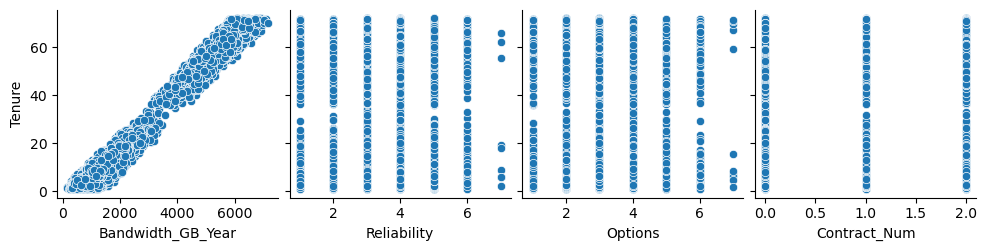

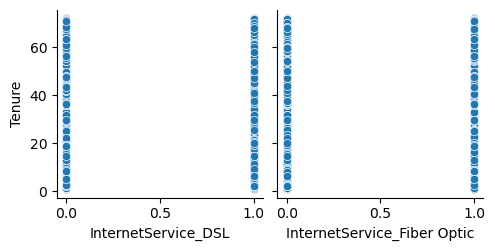

In [31]:
# list the independent variable column names
x_vars = ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts',
       'Yearly_equip_failure', 'Multiple', 'PaperlessBilling', 
       'Bandwidth_GB_Year', 'Reliability', 'Options', 'Contract_Num',
       'InternetService_DSL', 'InternetService_Fiber Optic']

# loop through subsets of the independent variables and create a pairplot for each one

for i in range(0, len(x_vars), 4):
    sns.pairplot(data=df_churn, x_vars=x_vars[i:i+4], y_vars=['Tenure'])

#### Tenure vs InternetService !!

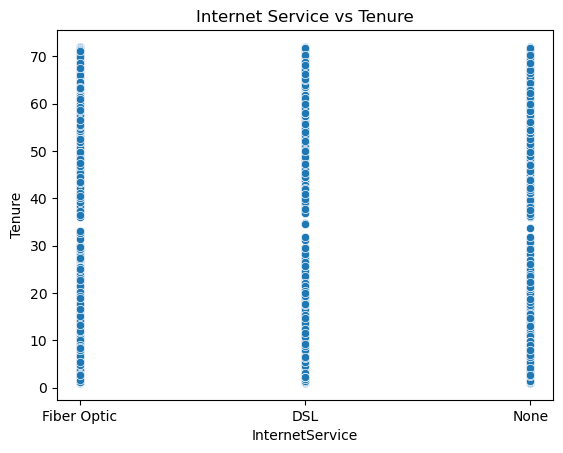

In [32]:
# create scatter plot to visualize relationship between Contunious variables Income and MonthlyCharge

sns.scatterplot(data=df_churn_origional, x='InternetService', y='Tenure')

# Add title
plt.title("Internet Service vs Tenure")
plt.show()

### Prepared Dataset   

In [33]:
# Extract the clean data in CSV format 
df_churn.to_csv('Churn_prepared.csv')

### Initial linear regression model

In [34]:
# Define the dependent variable (y) and independent variables (X)
y = df_churn['Tenure']
X = df_churn.drop(columns=['Tenure'])      

print(y.head())
print('*'*100)
print(X.head())

Customer_id
K409198     6.795513
S120509     1.156681
K191035    15.754144
D90850     17.087227
K662701     1.670972
Name: Tenure, dtype: float64
****************************************************************************************************
             Children  Age    Income  Outage_sec_perweek  Contacts  \
Customer_id                                                          
K409198             0   68  28561.99            7.978323         0   
S120509             1   27  21704.77           11.699080         0   
K191035             4   50   9609.57           10.752800         0   
D90850              1   48  18925.23           14.913540         2   
K662701             0   83  40074.19            8.147417         2   

             Yearly_equip_failure  Multiple  PaperlessBilling  \
Customer_id                                                     
K409198                         1         0                 1   
S120509                         1         1                 1   
K1

In [35]:
# Add a constant term to the independent variables
X = sm.add_constant(X)
X.head()

,const,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Multiple,PaperlessBilling,Bandwidth_GB_Year,Reliability,Options,Contract_Num,InternetService_DSL,InternetService_Fiber Optic
Customer_id,,,,,,,,,,,,,,,
K409198,1.0,0,68,28561.99,7.978323,0,1,0,1,904.536110,3,4,1,0,1
S120509,1.0,1,27,21704.77,11.699080,0,1,1,1,800.982766,3,4,0,0,1
K191035,1.0,4,50,9609.57,10.752800,0,1,1,1,2054.706961,4,4,2,1,0
D90850,1.0,1,48,18925.23,14.913540,2,0,0,1,2164.579412,2,5,2,1,0
K662701,1.0,0,83,40074.19,8.147417,2,1,0,0,271.493436,3,4,0,0,1


In [36]:
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

In [37]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.065e+05
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                -21874.
No. Observations:               10000   AIC:                         4.378e+04
Df Residuals:                    9985   BIC:                         4.389e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Evaluate the Initial Model

Model evaluation matrix - 

**(1) Adj. R-squared    :** 0.993 (adjusted for the number of variables in the regression)

**(2) Prob (F-statistic):** 0.00  (provide overall significance of the model) 

The value is close to 0 which implies that overall the regression is meaningfull and all the variables together has impact on my predicting varialble.  

### Residual Standard Error (Initial model) 

Reference - https://techhelpnotes.com/residual-standard-error-of-a-regression-in-python/

In [38]:
# Calculate the residual standard error
rse = np.sqrt(model.mse_resid)
print("Initial Model Residual Standard Error:", rse)

Initial Model Residual Standard Error: 2.1581009146776284


**RSE is an estimate of the standard deviation of error**

**Lower the RSE better the model is as it indicate that we have much more precise prediction** 

In [39]:
# Display the residuals of Initial model 
model.resid.head()

Customer_id
K409198   -1.151002
S120509   -2.630897
K191035    2.030577
D90850     0.241669
K662701    0.862922
dtype: float64

### Checking the Mean of the Residuals Equals 0

The mean of the residuals should be equal to zero. In my case mean this is very close to zero(0.0000000000007117). 

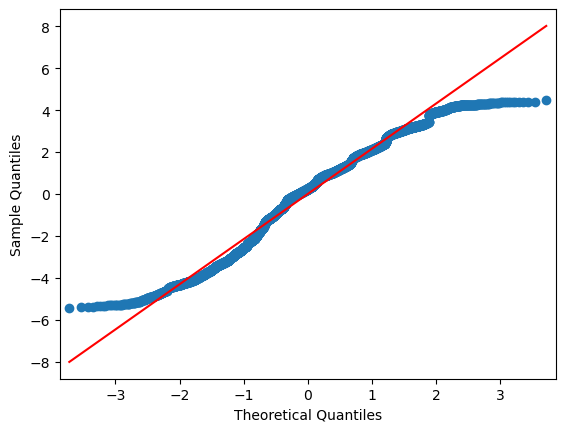

The mean of the residuals is 7.117e-13


In [40]:
import pylab

# check for the normality of the residuals
sm.qqplot(model.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model.resid)/ len(model.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [41]:
# Calculate the residuals
y_pred = model.predict(X)
y_pred.head()

Customer_id
K409198     7.946515
S120509     3.787578
K191035    13.723567
D90850     16.845558
K662701     0.808050
dtype: float64

In [42]:
# Calculate the residuals
residuals = y - y_pred
residuals.head()

Customer_id
K409198   -1.151002
S120509   -2.630897
K191035    2.030577
D90850     0.241669
K662701    0.862922
dtype: float64

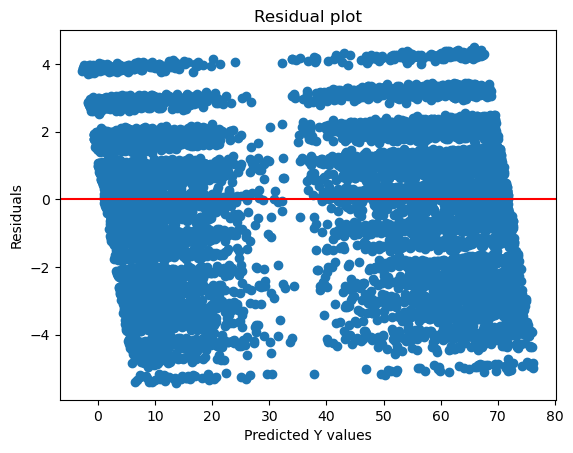

In [43]:
# Create the scatter plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Y values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

In [44]:
# use scikit-learn's mean_squared_error function:

rss = mean_squared_error(y, y_pred) * len(y)

In [45]:
print("RSS: ", rss)

RSS:  46504.13458595518


*This means that this model is unable to explain 46504 units of variance in the dependent variable.*

### Model Reduction - 

##### Feture selection method - backward stepwise elimination

Reference - 

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/
 
   - Wrapper Method - backward stepwise elimination

In [46]:
# While loop for backward stepwise elimination
while True:
    # Get the p-values of the coefficients
    p_values = model.pvalues
    
    # Find the index of the feature with the highest p-value
    max_index = np.argmax(p_values[1:])
    
    # If the highest p-value is greater than 0.05, remove the feature
    if p_values[max_index+1] > 0.05:
        X = X.drop(X.columns[max_index+1], axis=1)
        #lr = sm.OLS(y_init, X_init)
        #result = lr.fit()
        # Fit the multiple linear regression model
        model = sm.OLS(y, X).fit()
    else:
        break

# Print the selected features
print("Selected features:", X.columns[1:])

Selected features: Index(['Children', 'Age', 'Outage_sec_perweek', 'Multiple',
       'Bandwidth_GB_Year', 'InternetService_DSL'],
      dtype='object')


In [47]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.486e+05
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:06:53   Log-Likelihood:                -21876.
No. Observations:               10000   AIC:                         4.377e+04
Df Residuals:                    9993   BIC:                         4.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5734    

### Evaluate the Final Model


Model evaluation matrix - 

**(1) Adj. R-squared    :** 0.993 this is not decressed after removing many other variables !!
           
    - This indicates that 99.3 % of the variance in the tenure can be explained by the number of children, customer age,    outage sec per week, bandwidth used per year, whether the customer has multiple services or not, and which service providers they are with. 

**(2) Prob (F-statistic):** 0.00  (provide overall significance of the model) 

The value is close to 0 which implies that overall the regression is meaningfull and all the variables together has impact on my predicting varialble. 

### Regression equation for the reduced model

Tenure(y) = -5.5734 -0.3752 * Children + 0.0387 * Age  - 0.0158 * Outage_sec_perweek - 0.8933 * Multiple + 0.0121 * Bandwidth_GB_Year - 5.0286 * InternetService_DSL 

- The y-intercept is -5.5734 which means the estimated value of customer tenure when all the independent variables in the model are equal to zero is -5.5734. 

- Keeping all things constant, one unit increase in Children is associated with a 0.3752 unit decrease in Tenure.

- Keeping all things constant, one unit increase in Age is associated with a 0.0387 unit increase in Tenure.

- Keeping all things constant, one unit increase in Outage_sec_perweek is associated with a 0.0158 unit decrease in Tenure.

- The tenure of the customers will decrease by 0.8933 units if they have multiple services as compared to the customers who have single service.

- Keeping all things constant, one unit increase in Bandwidth_GB_Year is associated with a 0.0121 unit increase in Tenure.

- The tenure of the customers will decrease by 5.0286 units for DSL service providers as compared to the Non-DSL service providers


In [48]:
# Calculate the residual standard error
rse = np.sqrt(model.mse_resid)
print("Final Model Residual Standard Error:", rse)

Final Model Residual Standard Error: 2.157720865373507


In [49]:
# Display the residuals of Final model 

model.resid.head()

Customer_id
K409198   -1.108168
S120509   -2.575340
K191035    2.066747
D90850     0.191868
K662701    0.865616
dtype: float64

Reference - https://www.statology.org/q-q-plot-python/

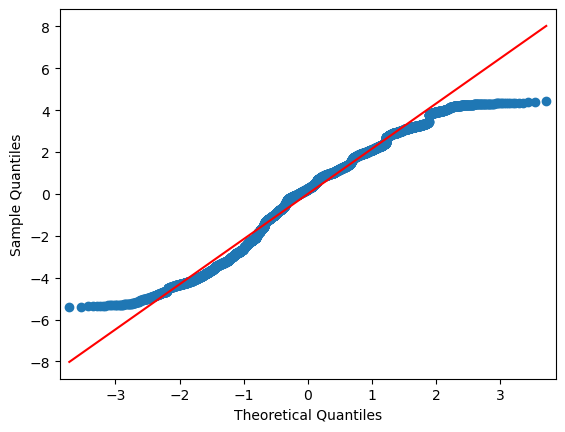

The mean of the residuals is -6.298e-13


In [50]:
import pylab

# check for the normality of the residuals
sm.qqplot(model.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model.resid)/ len(model.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### scatter plot for residuals

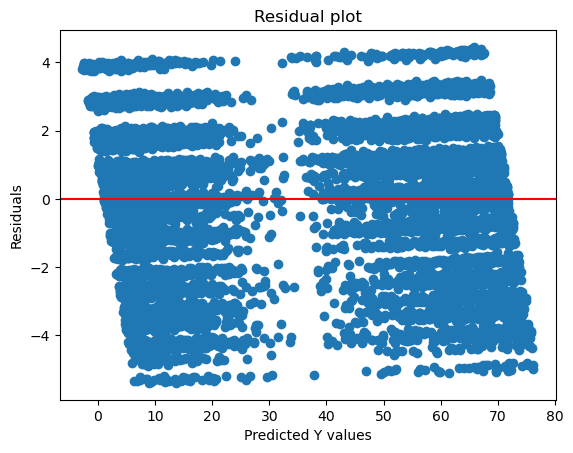

In [51]:
# Calculate the residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Create the scatter plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Y values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()


In [52]:
y_pred.head() 

Customer_id
K409198     7.903681
S120509     3.732021
K191035    13.687397
D90850     16.895359
K662701     0.805356
dtype: float64

In [53]:
# use scikit-learn's mean_squared_error function:

rss = mean_squared_error(y, y_pred) * len(y)
print("RSS: ", rss)

RSS:  46525.00301335188


### Check for Multicollinearity using VIF  

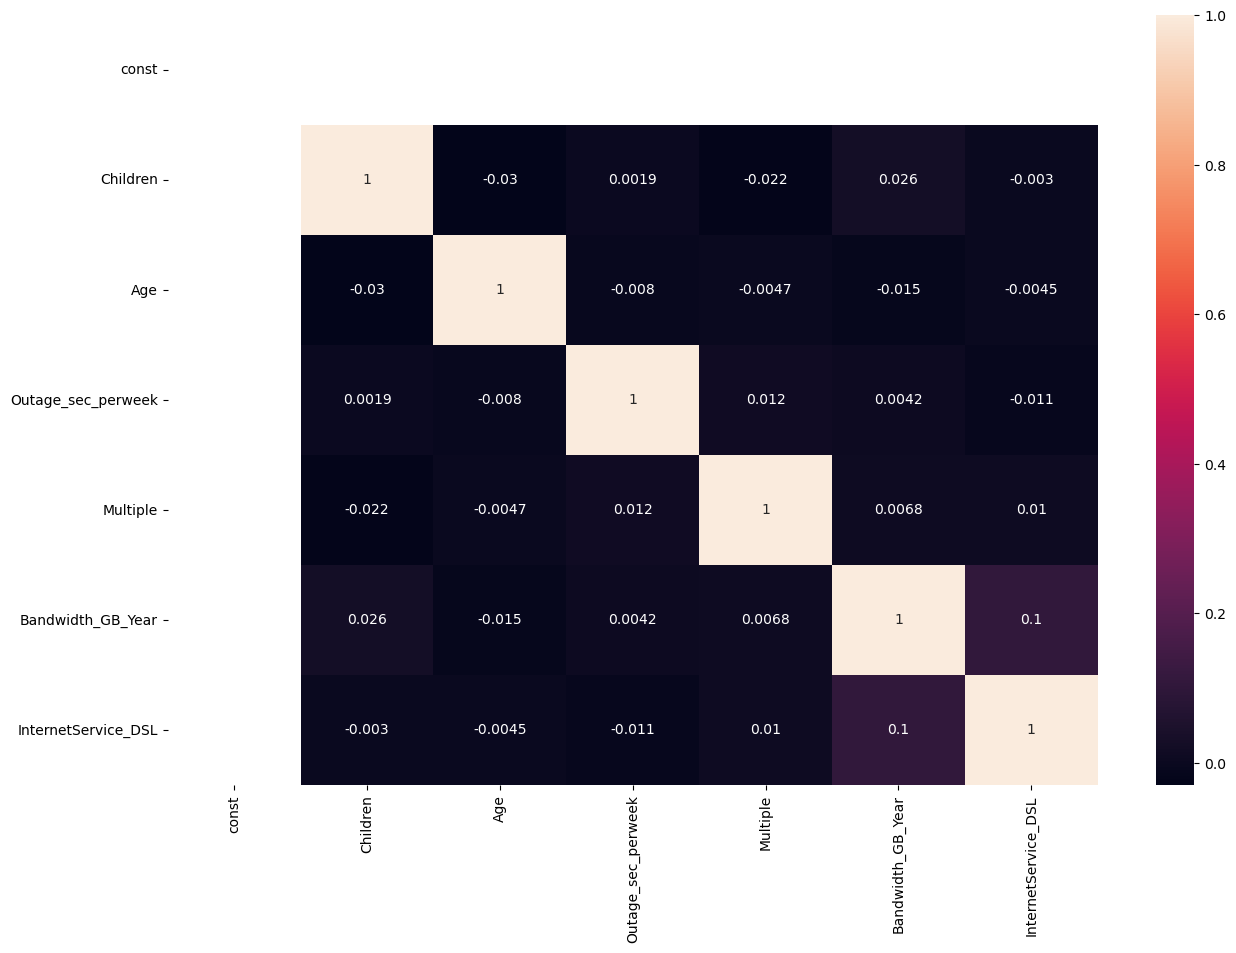

In [54]:
# calculate the correlation matrix
corr = X.corr()

# display the correlation matrix
#display(corr)

# plot the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

plt.show()

In [55]:
# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()

# Calculate the VIF for each independent variable

vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Format the output 
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by='VIF', ascending = False)
vif_data

,Feature,VIF
0,const,23.71
5,Bandwidth_GB_Year,1.01
6,InternetService_DSL,1.01
1,Children,1.00
2,Age,1.00
3,Outage_sec_perweek,1.00
4,Multiple,1.00


**Result** - *All the variable VIF is less than 5 for all the independent variables.* 

### Check for Heteroscedasticity 

- I am using the het_breuschpagan() function to perform the **Breusch-Pagan test** for heteroscedasticity. 

- The test returns a p-value, and if the p-value is less than the significance level (usually 0.05), it indicates that there is evidence of heteroscedasticity in the data.

In [56]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test for heteroscedasticity
_, p_value, _, _ = het_breuschpagan(model.resid, X)

# Print the p-value
print("Breusch-Pagan test p-value: ", p_value)

Breusch-Pagan test p-value:  0.028474407835583884


**Conclusion :** The p-value 0.028 is less that the significance level ( 0.05), it indicates that there is evidence of heteroscedasticity in the data. 


### Check the distribution of residuals

The resulting plot allow to verify 2 assumptions of a linear regression model

- Distribution of residuals are approximately normally distributed and 
- Distribution of residuals are centered around zero 

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


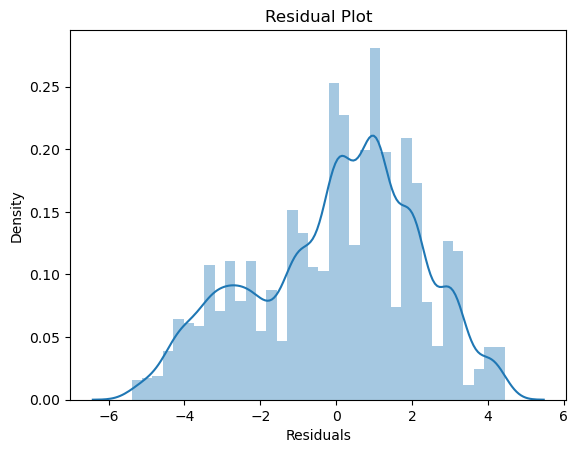

In [57]:
# disc plot 
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Results -** 

- This is not perfectly normally distributed but doen't have heavy tails so i can say that the linear regression model may be a good fit for the data. 

- The residuals doesn't have a mean of zero but very close to zero which indicates that the model is not systematically over- or under-predicting the target variable

### Prediction : 

In [58]:
X.head()

,const,Children,Age,Outage_sec_perweek,Multiple,Bandwidth_GB_Year,InternetService_DSL
Customer_id,,,,,,,
K409198,1.0,0,68,7.978323,0,904.536110,0
S120509,1.0,1,27,11.699080,1,800.982766,0
K191035,1.0,4,50,10.752800,1,2054.706961,1
D90850,1.0,1,48,14.913540,0,2164.579412,1
K662701,1.0,0,83,8.147417,0,271.493436,0


Children = 5

Age = 41

Outage_sec_perweek = 10

Multiple = 1

Bandwidth_GB_Year = 1000.00

InternetService_DSL = 1

Tenure ?

In [59]:
predicted_Tenure = model.predict([[1.0, 5, 41, 10, 1, 1000.00, 1]])
print ('The predicted tenure will be = ', predicted_Tenure[0])

The predicted tenure will be =  0.1852286545033337


In [60]:
# With Age = 61
predicted_Tenure = model.predict([[1.0, 5, 61, 10, 1, 1000.00, 1]])
print ('The predicted tenure will be = ', predicted_Tenure[0])

The predicted tenure will be =  0.9600584995899664


*Keeping all things constant, one unit increase in Age is associated with a 0.0387 unit increase in Tenure.*

In [61]:
# Outage_sec_perweek = 11
predicted_Tenure = model.predict([[1.0, 5, 61, 11, 1, 1000.00, 1]])
print ('The predicted tenure will be = ', predicted_Tenure[0])

The predicted tenure will be =  0.9442116189000633


*Keeping all things constant, one unit increase in Outage_sec_perweek is associated with a 0.0158 unit decrease in Tenure.*

In [62]:
# Bandwidth_GB_Year = 1500
predicted_Tenure = model.predict([[1.0, 5, 61, 11, 1, 1500.00, 1]])
print ('The predicted tenure will be = ', predicted_Tenure[0])

The predicted tenure will be =  7.007601116736284


*Keeping all things constant, one unit increase in Bandwidth_GB_Year is associated with a 0.0121 unit increase in Tenure.*

In [63]:
# No DSL !! 
predicted_Tenure = model.predict([[1.0, 5, 61, 11, 1, 1500.00, 0]])
print ('The predicted tenure will be = ', predicted_Tenure[0])

The predicted tenure will be =  12.036232378834015


*The tenure of the customer’s will be decreased by 5.0286 unit for DSL service provider as compared to the Non-DSL service providers.* 

In [64]:
# Multiple = 0 ie single service
predicted_Tenure = model.predict([[1.0, 5, 61, 11, 0, 1500.00, 0]])
print ('The predicted tenure will be = ', predicted_Tenure[0])

The predicted tenure will be =  12.929534087034547


*The tenure of the customer’s will decreased  by 0.8933 unit if they have multiple services as compared to the customers who has single service.* 

*This is single service so tenure has incressed* 